In [13]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import astropy
from astropy.io import fits
import sys

In [14]:
filename='matchstars_tight_v2.csv'
valsin=np.loadtxt(filename,dtype=float,delimiter=',',skiprows=1)
#valsin is our data
colvals=np.loadtxt('uds_headerslist.txt',dtype=str,usecols=0)
colval2=np.loadtxt('matchstars_headers',dtype=str,delimiter=' | ')
colnames=np.concatenate((colvals,colval2))
colnames=colnames[0:29]
colnames[28]='Separation'
colnames[9]='id'
colnames[10]='ra'
colnames[11]='dec'
colnames[16]='f_f160w'
print(colnames)
#these column names define what each column is

#make easy region files for ds9 check
#i=0
#for i in range(len(valsin[:,12])):
#    print('circle(',valsin[i,1],',',valsin[i,2],',','7.0"',')')

['NUMBER' 'ALPHA_J2000' 'DELTA_J2000' 'FLUX_APER' 'FLUXERR_APER'
 'FWHM_IMAGE' 'FLAGS' 'CLASS_STAR' 'FLUX_RADIUS' 'id' 'ra' 'dec'
 'faper_f160w' 'eaper_f160w' 'faper_f140w' 'eaper_f140w' 'f_f160w'
 'e_f160w ' 'w_f160w ' 'star_flag' 'a_image' 'b_image' 'class_star'
 'flux_radius' 'fwhm_image' 'flags' 'contam_flag' 'use_phot' 'Separation']


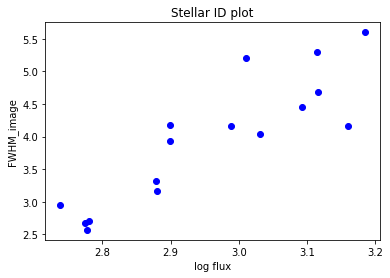

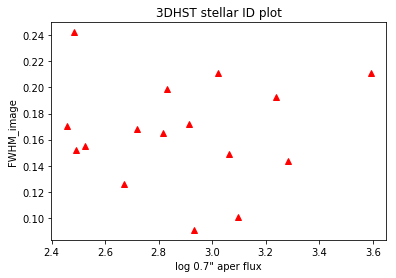

In [28]:
#column 3 is 'FLUX_APER' produced by running SE on the (trimmed) F160W band image of IRC0218 from Gabe's database
#the aperture was set to 7.0 pixels, since the pixel scale is 0.1
#logflux isn't quite magnitude but it should be proportional to it
flux=valsin[:,3]
flux_err=valsin[:,4]
flux_3dhst=valsin[:,12]
flux_err_3dhst=valsin[:,13]
logflux=np.log10(valsin[:,3])

fwhmim=valsin[:,5]
#column 5 is the 'FWHM_IMAGE' produced running SE on the (trimmed) F160W band image of IRC0218 from Gabe's database

plt.figure()
plt.title('Stellar ID plot')
plt.xlabel('log flux')
plt.ylabel('FWHM_image')

plt.plot(logflux,fwhmim,'bo')
plt.show()

#column 12 is the f_aperf160w value from the 3DHST catalog. This is the flux in the 0.7 arcsec aperture
#column 23 is the 'FWHM_IMAGE' from the 3DHST catalog.
plt.plot(np.log10(valsin[:,12]),valsin[:,23],'r^')
plt.title('3DHST stellar ID plot')
plt.xlabel('log 0.7" aper flux')
plt.ylabel('FWHM_image')
plt.show()

I don't really know what to think about these plots. The red values are the data from 3DHST, the blue the same data from our analysis/sextractor run of the dataset.

Now, onto the math. set phot parameters. ABMAG = -2.5xlogFv -48.6; Fv needs to be ergs/cm2/s/Hz; easy, using photnu instead of photlambda. for the 3dhst set, magAB = 25.0-2.5xlog10(flux), no conversion needed

In [16]:
photfnu=1.518757E-07
photflam=1.9275602E-20
photplam=15369.176
#assuming, since photflam is in coordinates of erg/cm2/A/electron, 
#that photfnu is erg/cm2/Hz/electron

Update 16 June 2020: Greg suggests I am going about this from the wrong direction; instead of turning e/s into flux to get mag, I should turn e/s into mag to get flux
#old version below
#so as described above, and in the WFC3 handbook, and as we talked about in the latex documents I made
#ABmag= -2.5 x log(Fv) -48.6, and Fv needs to be in units of ergs/cm2/s/Hz

abmag=(-2.5 x np.log10(photfnu times valsin[:,3]))-48.6


abmag_3dhst=-2.5xnp.log10(valsin[:,12])+25.0
#magAB = 25.0-2.5xlog10(flux)



In [29]:
#new version here
abmag_zpt= -2.5*np.log10(photflam) -21.10 -5.0*np.log10(photplam) +18.692
abmag=-2.5*np.log10(flux) +abmag_zpt
#that's our version above, compared to the vals from 3dhst below
abmag_3dhst= -2.5*np.log10(flux_3dhst)+25.0

#hmm, error propagation

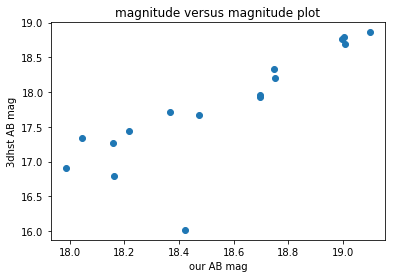

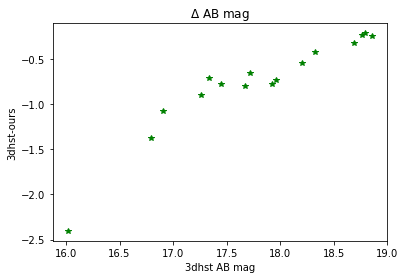

In [22]:
plt.plot(abmag,abmag_3dhst,'o')
plt.title('magnitude versus magnitude plot')
plt.xlabel('our AB mag')
plt.ylabel('3dhst AB mag')
plt.show()
plt.plot(abmag_3dhst,abmag_3dhst-abmag,'g*')
plt.title(r'$\Delta$ AB mag')
plt.xlabel('3dhst AB mag')
plt.ylabel('3dhst-ours')
plt.show()